# MACHINE LEARNING WITH PYTHON

# Eksplorasi Data: Memahami Data dengan Statistik - Part 1

Gunakan .shape, .head(), .info(), dan .describe() untuk mengeksplorasi dataset secara berurut. Dataset ini adalah data pembeli online yang mengunjungi website dari suatu e-commerce selama setahun, yaitu 'https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv',”

# Eksplorasi Data: Memahami Data dengan Statistik - Part 2

Data eksplorasi tidaklah cukup dengan mengetahui dimensi data dan statistical properties saja, tetapi kita juga perlu sedikit menggali tentang hubungan atau korelasi dari setiap feature, karena beberapa algorithm seperti linear regression dan logistic regression akan menghasilkan model dengan performansi yang buruk jika kita menggunakan feature/variabel saling dependensi atau berkorelasi kuat (multicollinearity). Jadi, jika kita sudah tahu bahwa data kita berkorelasi kuat, kita bisa menggunakan algorithm lain yang tidak sensitif terhadap hubungan korelasi dari feature/variabel seperti decision tree.

Mengetahui distribusi label sangat penting untuk permasalahan klasifikasi, karena jika distribusi label sangat tidak seimbang (imbalanced class),  maka akan sulit bagi model untuk mempelajari pola dari LABEL yang sedikit dan hasilnya bisa misleading. Contohnya, kita memiliki 100 row data, 90 row adalah non fraud dan 10 row adalah fraud. Jika kita menggunakan data ini tanpa melakukan treatment khusus (handling imbalanced class), maka kemungkinan besar model kita akan cenderung mengenali observasi baru sebagai non-fraud, dan hal ini tentunya tidak diinginkan

     inspeksi nilai korelasi dari fitur-fitur berikut pada dataset_corr yang telah diberikan sebelumnya

    []  ExitRates dan BounceRates

    []  Revenue dan PageValues
    
    []  TrafficType dan Weekend



In [3]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
# [1] Eksplorasi data 1
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())
# [2] Eksplorasi data 2
# Cara 1
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())
# Tugas praktek
print('Korelasi BounceRates-ExitRates:', dataset['BounceRates'].corr(dataset['ExitRates']))
print('Korelasi Revenue-PageValues:', dataset['Revenue'].corr(dataset['PageValues']))
print('Korelasi TrafficType-Weekend:', dataset['TrafficType'].corr(dataset['Weekend']))
# Cara 2
print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates','ExitRates'])
print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue','PageValues'])
print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType','Weekend'])

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         

# Eksplorasi Data: Memahami Data dengan Visual

melihat distribusi label dalam bentuk visual, dan jumlah pembelian saat weekend. Kita dapat memanfaatkan matplotlib library untuk membuat chart yang menampilkan perbandingan jumlah yang membeli (1) dan tidak membeli (0)serta perbandingan jumlah pembelian saat weekend

C:\Users\Asus\mambaforge\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\mambaforge\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


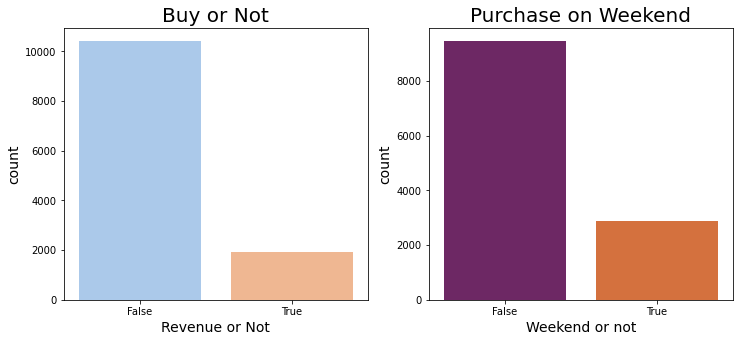

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or Not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekend', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()

# HISTOGRAM

Histogram yang menggambarkan jumlah customer untuk setiap Region

Menggunakan dataset['Region'] untuk membuat histogram, dan berikan judul 'Distribution of Customers' pada title, 'Region Codes' sebagai label axis-x dan 'Count Users' sebagai label axis-y.

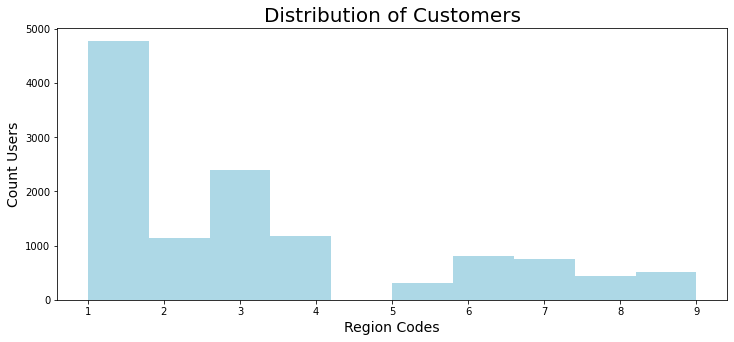

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers', fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

# Data Pre-processing: Handling Missing Value - Part 1

 Jika kita memiliki banyak missing value, maka akan mengurangi performansi model dan juga beberapa algorithm machine learning tidak dapat memproses data dengan missing value. Oleh karena itu, kita perlu mengecek apakah terdapat missing value dalam data atau tidak. Jika tidak, maka kita tidak perlu melakukan apa-apa dan bisa melanjutkan ke tahap berikutnya. Jika ada, maka kita perlu melakukan treatment khusus untuk missing value

    Menggunakan metod .isnull pada dataset dan kemudian men-chaining-nya dengan method sum. Untuk jumlah keseluruhan missing value digunakan chaining method sum sekali lagi. 

# Data Pre-processing: Handling Missing Value - Part 2

Ada beberapa metode yang dapat kita lakukan untuk menangani missing value. menghapus data adalah salah satunya Tetapi, metode ini tidak dapat serta merta diimplementasikan. Kita juga perlu menganalisis penyebaran missing value, dan berapa persen jumlah missing value dalam data kita

[!] Metode ini dapat diterapkan jika tidak banyak missing value dalam data, sehingga walaupun data point ini dihapus, kita masih memiliki sejumlah data yang cukup untuk melatih model Machine Learning. Tetapi jika kita memiliki banyak missing value dan tersebar di setiap variabel, maka metode menghapus missing value tidak dapat digunakan. Kita akan kehilangan sejumlah data yang tentunya mempengaruhi performansi model. Kita bisa menghapus data point yang memiliki missing value dengan fungsi .dropna( ) dari pandas library. Fungsi dropna( ) akan menghapus data point atau baris yang memiliki missing value.

In [6]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())
# before droping na datashape
print('Before droping na:', dataset.shape)
#Drop rows with missing value   
dataset_clean = dataset.dropna()
print('Ukuran dataset_clean:', dataset_clean.shape)

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112
Before droping na: (12330, 18)
Ukuran dataset_clean: (12316, 18)


# Data Pre-processing: Handling Missing Value - Part 3

Menggunakan metode impute missing value, yaitu mengisi record yang hilang ini dengan suatu nilai. Ada berbagai teknik dalam metode imputing, mulai dari yang paling sederhana yaitu mengisi missing value dengan nilai mean, median, modus, atau nilai konstan, sampai teknik paling advance yaitu dengan menggunakan nilai yang diestimasi oleh suatu predictive model. Untuk kasus ini, kita akan menggunakan imputing sederhana yaitu menggunakan nilai rataan atau mean

Imputing missing value sangat mudah dilakukan di Python, cukup memanfaatkan fungsi .fillna() dan .mean() dari Pandas

In [5]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

C:\Users\Asus\AppData\Local\Temp/ipykernel_3856/1175221403.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


# Praktekkan metode imputing missing value dengan menggunakan nilai median

In [7]:
import pandas as pd
dataset1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with median of feature value  
dataset1.fillna(dataset1.median(), inplace = True)
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

C:\Users\Asus\AppData\Local\Temp/ipykernel_3856/4189180468.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset1.fillna(dataset1.median(), inplace = True)


# Data Preprocessing: Scaling

Beberapa machine learning seperti K-NN dan gradient descent mengharuskan semua variabel memiliki rentang nilai yang sama, karena jika tidak sama, feature dengan rentang nilai terbesar misalnya ProductRelated_Duration otomatis akan menjadi feature yang paling mendominasi dalam proses training/komputasi, sehingga model yang dihasilkan pun akan sangat bias. Oleh karena itu, sebelum memulai training model, kita terlebih dahulu perlu melakukan data rescaling ke dalam rentang 0 dan 1, sehingga semua feature berada dalam rentang nilai tersebut, yaitu nilai max = 1 dan nilai min = 0. Data rescaling ini dengan mudah dapat dilakukan di Python menggunakan .MinMaxScaler( ) dari Scikit-Learn library.



Proses scaling hanya bisa dilakukan untuk feature dengan tipe numerik, sedangkan dalam dataset online_raw, terdapat feature dengan tipe string atau karakter dan categorical, seperti Month, VisitorType, Region. Oleh karena itu, kita tidak dapat langsung menggunakan code di atas, tetapi kita perlu terlebih dahulu menyeleksi feature - feature dari dataset yang bertipe numerik.

langkah - langkah untuk proses scaling dengan dataset yang memiliki feature dengan tipe data yang berbeda:

    []  Import MinMaxScaler dari sklearn.preprocessing

    []  Deklarasikan fungsi MinMaxScaler() ke dalam variabel scaler

    []  List semua feature yang akan di-scaling dan beri nama scaling_column yaitu : ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

    []  Berdasarkan contoh code yang dipraktekkan oleh Aksara, ganti dataset.columns dengan scaling_column.

In [8]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

C:\Users\Asus\AppData\Local\Temp/ipykernel_3856/1547432527.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


# Data Pre-processing: Konversi string ke numerik

Terdapat dua kolom yang bertipe object yang dinyatakan dalam tipe data str, yaitu kolom 'Month' dan 'VisitorType'. Karena setiap algoritma machine learning bekerja dengan menggunakan nilai numeris, maka kita perlu mengubah kolom dengan tipe pandas object atau str ini ke bertipe numeris.

Label unik kolom 'Month':

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


Label unik kolom 'VisitorType':

['Returning_Visitor' 'New_Visitor' 'Other'] 

Menggunakan LabelEncoder dari sklearn.preprocessing untuk merubah kedua kolom ini ke numerik (int, float)

LabelEncoder akan mengurutkan label secara otomatis secara alfabetik, posisi/indeks dari setiap label ini digunakan sebagai nilai numeris konversi pandas objek ke numeris (dalam hal ini tipe data int). Dengan demikian kita telah membuat dataset kita menjadi dataset bernilai numeris seluruhnya yang siap digunakan untuk pemodelan dengan algoritma machine learning tertentu

In [9]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


C:\Users\Asus\AppData\Local\Temp/ipykernel_3856/363161620.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


# Features & Label

Dalam dataset user online purchase, label target sudah diketahui, yaitu kolom Revenue yang bernilai 1 untuk user yang membeli dan 0 untuk yang tidak membeli, sehingga pemodelan yang dilakukan ini adalah klasifikasi. Nah, untuk melatih dataset menggunakan Scikit-Learn library, dataset perlu dipisahkan ke dalam Features dan Label/Target. Variabel Feature akan terdiri dari variabel yang dideklarasikan sebagai X dan [Revenue] adalah variabel Target yang dideklarasikan sebagai y. Gunakan fungsi drop() untuk menghapus kolom [Revenue] dari dataset.

In [10]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])

# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis = 1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


C:\Users\Asus\AppData\Local\Temp/ipykernel_3856/2361059328.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


# Training dan Test Dataset

Sebelum kita melatih model dengan suatu algorithm machine , seperti yang saya jelaskan sebelumnya, dataset perlu kita bagi ke dalam training dataset dan test dataset dengan perbandingan 80:20. 80% digunakan untuk training dan 20% untuk proses testing

Perbandingan lain yang biasanya digunakan adalah 75:25. Hal penting yang perlu diketahui adalah scikit-learn tidak dapat memproses dataframe dan hanya mengakomodasi format data tipe Array. Tetapi kalian tidak perlu khawatir, fungsi train_test_split( ) dari Scikit-Learn, otomatis mengubah dataset dari dataframe ke dalam format array. 

Fungsi Training adalah melatih model untuk mengenali pola dalam data, sedangkan testing berfungsi untuk memastikan bahwa model yang telah dilatih tersebut mampu dengan baik memprediksi label dari new observation dan belum dipelajari oleh model sebelumnya. 

Bagi dataset ke dalam Training dan Testing dengan melanjutkan coding yang  sudah kukerjakan ini. Gunakan test_size = 0.2 dan tambahkan argumen random_state = 0,  pada fungsi train_test_split( ).

In [11]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


C:\Users\Asus\AppData\Local\Temp/ipykernel_3856/2147220085.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


# Training Model: Fit

Dengan Scikit-Learn, proses ini menjadi sangat sederhana. Kita cukup memanggil nama algorithm yang akan kita gunakan, biasanya disebut classifier untuk problem klasifikasi, dan regressor untuk problem regresi

kita akan menggunakan Decision Tree. Kita hanya perlu memanggil fungsi DecisionTreeClassifier() yang kita namakan “model”. Kemudian menggunakan fungsi .fit() dan X_train, y_train untuk melatih classifier tersebut dengan training dataset

In [12]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train,y_train)

C:\Users\Asus\AppData\Local\Temp/ipykernel_3856/2503975781.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


# Training Model: Predict

Setelah model/classifier terbentuk, selanjutnya kita menggunakan model ini untuk memprediksi LABEL dari testing dataset (X_test), menggunakan fungsi .predict(). Fungsi ini akan mengembalikan hasil prediksi untuk setiap data point dari X_test dalam bentuk array. Proses ini kita kenal dengan TESTING

proses testing menggunakan fungsi .predict()

In [13]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)

# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(2466,)


C:\Users\Asus\AppData\Local\Temp/ipykernel_3856/3942385959.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


# Evaluasi Model Performance - Part 1

Kita bisa munculkan dengan fungsi .score( ). Tetapi, di banyak real problem, accuracy saja tidaklah cukup. Metode lain yang digunakan adalah dengan Confusion Matrix. Confusion Matrix merepresentasikan perbandingan prediksi dan real LABEL dari test dataset yang dihasilkan oleh algoritma ML

Confusion matrix:

[[TP  FP]

 [ FN  TN]]

True Positive (TP): Jika user diprediksi (Positif) membeli ([Revenue] = 1]), dan memang benar(True) membeli.

True Negative (TN): Jika user diprediksi tidak (Negatif) membeli dan aktualnya user tersebut memang (True) membeli.

False Positive (FP): Jika user diprediksi Positif membeli, tetapi ternyata tidak membeli (False).

False Negatif (FN): Jika user diprediksi tidak membeli (Negatif), tetapi ternyata sebenarnya membeli.

# Evaluasi Model Performance - Part 2

Untuk menampilkan confusion matrix cukup menggunakan fungsi confusion_matrix() dari Scikit-Learn

Berdasarkan confusion matrix, dapat mengukur metrik - metrik berikut :

Accuracy = (TP + TN ) / (TP+FP+FN+TN)

Precision = (TP) / (TP+FP)

Recall = (TP) / (TP + FN)

F1 Score = 2 * (Recall*Precission) / (Recall + Precission)
 

Tidak perlu menghitung nilai ini secara manual. Cukup gunakan  fungsi classification_report() untuk memunculkan hasil perhitungan metrik - metrik tersebut.

In [14]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8600973236009732

Confusion matrix:
[[1884  160]
 [ 185  237]]

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.92      2044
        True       0.60      0.56      0.58       422

    accuracy                           0.86      2466
   macro avg       0.75      0.74      0.75      2466
weighted avg       0.86      0.86      0.86      2466



C:\Users\Asus\AppData\Local\Temp/ipykernel_3856/349762213.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric), maka bisa gunakan Accuracy, tetapi jika tidak seimbang, maka sebaiknya menggunakan F1-Score.

Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan Recall.

Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan Precision.

Contohnya adalah pada kasus klasifikasi email SPAM atau tidak. Banyak orang lebih memilih jika email yang sebenarnya SPAM namun diprediksi tidak SPAM (sehingga tetap ada pada kotak masuk email kita), daripada email yang sebenarnya bukan SPAM tapi diprediksi SPAM (sehingga tidak ada pada kotak masuk email).

# Pemodelan Permasalahan Klasifikasi dengan Logistic Regression

Pemodelan Logistic Regression dengan memanfaatkan Scikit-Learn sangatlah mudah. Dengan menggunakan dataset yang sama yaitu online_raw, dan setelah dataset dibagi ke dalam Training Set dan Test Set, cukup menggunakan modul linear_model dari Scikit-learn, dan memanggil fungsi LogisticRegression() yang diberi nama logreg.

Kemudian, model yang sudah ditraining ini  bisa digunakan untuk memprediksi output/label dari test dataset sekaligus mengevaluasi model performance dengan fungsi score(), confusion_matrix() dan classification_report().

In [4]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train,y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 0.8838199513381995
Testing Accuracy : 0.8665855636658556

Confusion matrix
[[1990   54]
 [ 275  147]]

Classification report
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      2044
        True       0.73      0.35      0.47       422

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.85      0.87      0.85      2466



C:\Users\Asus\AppData\Local\Temp/ipykernel_15876/2721866285.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)
C:\Users\Asus\mambaforge\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# DECISION TREE

Dengan menggunakan dataset online_raw.csv dan diasumsikan sudah melakukan EDA dan pre-processing, aku akan membuat model machine learning dengan menggunakan decision tree :

[1] Import DecisionTreeClassifier dan panggil fungsi tersebut dengan nama decision_tree

[2] Split dataset ke dalam training & testing dataset dengan perbandingan 70:30, dengan random_state = 0

[3] Latih model dengan training feature (X_train) dan training target (y_train) menggunakan .fit()

[4] Evaluasi hasil model decision_tree yang sudah dilatih dengan testing feature (X_test) dan print nilai akurasi dari training dan testing dengan fungsi .score()
 

In [3]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train, y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train,y_train))
print('Testing Accuracy :', decision_tree.score(X_test,y_test))

C:\Users\Asus\AppData\Local\Temp/ipykernel_15876/356098151.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


Training Accuracy : 1.0
Testing Accuracy : 0.8569883752365505


# Regression: Linear Regression - Part 1

Regression merupakan metode statistik dan machine learning yang paling banyak digunakan. Seperti yang dijelaskan sebelumnya, regresi digunakan untuk memprediksi output label yang berbentuk numerik atau continuous value. Dalam proses training, model regresi akan menggunakan variabel input (features) dan variabel output (label) untuk mempelajari bagaimana hubungan/pola dari variabel input dan output.

Model regresi terdiri atas 2 tipe yaitu :

[1]  Simple regression model → model regresi paling sederhana, hanya terdiri dari satu feature (univariate) dan 1 target.

[2] Multiple regression model → sesuai namanya, terdiri dari lebih dari satu feature (multivariate).
Adapun model regresi yang paling umum digunakan adalah Linear Regression.


# Regression: Linear Regression - Part 2

Linear regression digunakan untuk menganalisis hubungan linear antara dependent variabel (feature) dan independent variabel (label). Hubungan linear disini berarti bahwa jika nilai dari independen variabel mengalami perubahan baik itu naik atau turun, maka nilai dari dependen variabel juga mengalami perubahan (naik atau turun). 

Perlu diketahui bahwa tidak semua problem dapat diselesaikan dengan linear regression. Untuk pemodelan dengan linear regression, terdapat beberapa asumsi yang harus dipenuhi, yaitu :

[1] Terdapat hubungan linear antara variabel input (feature) dan variabel output(label). Untuk melihat hubungan linear feature dan label, dapat menggunakan chart seperti scatter chart. Untuk mengetahui hubungan dari variabel umumnya dilakukan pada tahap eksplorasi data.

[2] Tidak ada multicollinearity antara features. Multicollinearity artinya terdapat dependency antara feature, misalnya saja hanya bisa mengetahui nilai feature B jika nilai feature A sudah diketahui.

[3] Tidak ada autocorrelation dalam data, contohnya pada time-series data.
 

Pemodelan Linear regression menggunakan scikit-learn tidaklah sulit. Secara prosedur serupa dengan pemodelan logistic regression. Cukup memanggil LinearRegression dengan terlebih dahulu meng-import fungsi tersebut :

from sklearn.linear_model import LinearRegression

# Linear Regression 3

“Oke, saya tahu kamu sudah enggak sabar. Sebelumnya kamu membuat modellingnya, saya jelaskan prosedur dan library yang tepat untuk digunakan ya, nanti saya akan email detail intruksinya.”

Aku pun menunggu email dari Senja. Setelah beberapa menit, pesan yang kutunggu akhirnya muncul:

[1] Pisahkan dataset ke dalam Feature dan Label, gunakan fungsi .drop(). Pada dataset ini, label/target adalah variabel MEDV

[2] Checking dan print jumlah data setelah Dataset pisahkan ke dalam Feature dan Label, gunakan .shape()

[3] Bagi dataset ke dalam Training dan test dataset, 70% data digunakan untuk training dan 30% untuk testing, gunakan fungsi train_test_split() , dengan random_state = 0

[4] Checking dan print kembali jumlah data dengan fungsi .shape()

[5] Import LinearRegression dari sklearn.linear_model

[6] Deklarasikan  LinearRegression regressor dengan nama reg

[7] Fit regressor ke training dataset dengan .fit(), dan gunakan .predict() untuk memprediksi nilai dari testing dataset.

In [2]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

##import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train,y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


# Regression Performance Evaluation

Untuk model regression, kita menghitung selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred) yang disebut error, adapun beberapa metric yang umum digunakan.

[1] Mean Squared Error (MSE) adalah rata-rata dari squared error:

[2] Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE

[3] Mean Absolute Error (MAE) adalah rata-rata dari nilai absolut error

Semakin kecil nilai MSE, RMSE, dan MAE, semakin baik pula performansi model regresi. Untuk menghitung nilai MSE, RMSE dan MAE dapat dilakukan dengan menggunakan fungsi mean_squared_error () ,  mean_absolute_error () dari scikit-learn.metrics dan untuk RMSE sendiri tidak terdapat fungsi khusus di scikit-learn tapi dapat dengan mudah kita hitung dengan terlebih dahulu menghitung MSE kemudian menggunakan numpy module yaitu, sqrt() untuk memperoleh nilai akar kuadrat dari MSE

# Linear Regression 4

Apabila sudah paham evaluasi performa model regresi, coba hitung nilai MSE, MAE, dan RMSE dari linear modelnya

intruksi:

[1] Import library yang digunakan: mean_squared_error, mean_absolute_error dari  sklearn.metrics dan numpy sebagai aliasnya yaitu np. Serta, import juga matplotlib.pyplot sebagai aliasnya, plt.

[2] Hitung dan print nilai MSE dan RMSE dengan menggunakan argumen y_test dan y_pred, untuk rmse gunakan np.sqrt()

[3] Buat scatter plot yang menggambarkan hasil prediksi (y_pred) dan harga actual (y_test)
 

Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.07789896103120689
Root Mean Squared Error of testing set: 0.1044654232549747


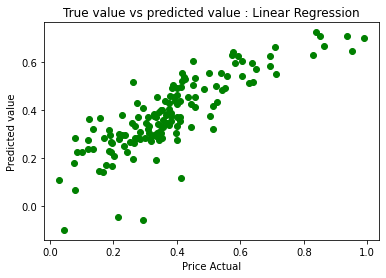

In [4]:
import pandas as pd
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')

from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

# Unsupervised Learning 

Unsupervised Learning adalah teknik machine learning dimana tidak terdapat label atau output yang digunakan untuk melatih model. Jadi, model dengan sendirinya akan bekerja untuk menemukan pola atau informasi dari dataset yang ada. Metode unsupervised learning yang dikenal dengan clustering. Sesuai dengan namanya, Clustering memproses data dan mengelompokkannya atau mengcluster objek/sample berdasarkan kesamaan antar objek/sampel dalam satu kluster, dan objek/sample ini cukup berbeda dengan objek/sample di kluster yang lain.

# K-Means Clustering

K-Means merupakan tipe clustering dengan centroid based (titik pusat). Artinya kesamaan dari objek/sampel dihitung dari seberapa dekat objek itu dengan centroid atau titik pusat.

Untuk menentukan centroid, pada awalnya kita perlu mendefinisikan jumlah centroid (K) yang diinginkan, semisalnya kita menetapkan jumlah K = 3; maka pada awal iterasi, algorithm akan secara random menentukan 3 centroid. Setelah itu, objek/sample/data point yang lain akan dikelompokkan sebagai anggota dari salah satu centroid yang terdekat, sehingga terbentuk 3 cluster data.

Iterasi selanjutnya, titik-titik centroid diupdate atau berpindah ke titik yang lain, dan jarak dari data point yang lain ke centroid yang baru dihitung kembali, kemudian dikelompokkan kembali berdasarkan jarak terdekat ke centroid yang baru. Iterasi akan terus berlanjut hingga diperoleh cluster dengan error terkecil, dan posisi centroid tidak lagi berubah.

Secara prosedur, tahap eksplorasi data untuk memahami karakteristik data, dan tahap preprocessing tetap dilakukan. Tetapi dalam unsupervised learning, kita tidak membagi dataset ke feature dan label; dan juga ke dalam training dan test dataset, karena pada dasarnya kita tidak memiliki informasi mengenai label/target data

# K-Means

Dataset ini merupakan data customer suatu mall dan berisi basic informasi customer berupa : CustomerID, age, gender, annual income, dan spending score.  Adapun tujuan dari clustering adalah untuk memahami customer - customer mana saja yang sering melakukan transaksi sehingga informasi ini dapat diberikan kepada marketing team untuk membuat strategi promosi yang sesuai dengan karakteristik customer.

Kita akan melakukan segmentasi customer, dengan memanfaatkan fungsi KMeans dari Scikit-Learn.cluster.

[1] Import pandas sebagai aliasnya dan KMeans dari sklearn.cluster.


[2] Load dataset 'https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv' dan beri nama dataset

[3] Diasumsikan EDA dan preprocessing sudah dilakukan, selanjutnya kita memilih feature yang akan digunakan untuk membuat model yaitu annual_income dan spending_score. Assign dataset dengan feature yang sudah dipilih ke dalam 'X'. Pada dasarnya terdapat teknik khusus yang dilakukan untuk menyeleksi feature - feature (Feature Selection) mana saja yang dapat digunakan untuk machine learning modelling, karena tidak semua feature itu berguna. Beberapa feature justru bisa menyebabkan performansi model menurun. Tetapi untuk problem ini, secara default kita akan menggunakan annual_income dan spending_score.

[4] Deklarasikan  KMeans( )  dengan nama cluster_model dan gunakan n_cluster = 5. n_cluster adalah argumen dari fungsi KMeans( ) yang merupakan jumlah cluster/centroid (K).  random_state = 24.

[5] Gunakan fungsi .fit_predict( ) dari cluster_model pada 'X'  untuk proses clustering.

In [5]:
#import library
import pandas as pd  
from sklearn.cluster import KMeans

#load dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv')

#selecting features  
X = dataset[['annual_income','spending_score']]  

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

# K-Means 2

Inspect & Visualizing the Cluster

[1] Pertama - tama, import matplotlib.pyplot dan beri inisial plt.

[2] Gunakan fungsi .values untuk mengubah tipe ‘X’ dari dataframe menjadi array

[3] Pisahkan X kedalam xs dan ys, di mana xs adalah Kolom index [0] dan ys adalah kolom index [1]

[4] Buatlah scatter plot plt.scatter() dari xs dan ys, kemudian tambahkan c = labels untuk secara otomatis memberikan warna yang berbeda pada setiap cluster, dan alpha = 0.5 ke dalam scatter plot argumen.

[5] Hitunglah koordinat dari centroid menggunakan .cluster_centers_ dari cluster_model, deklarasikan ke dalam variabel centroids.

[6] Pisahkan centroids kedalam centroids_x dan centroids_y, di mana centroids_x adalah kolom index [0] dan centroids_y adalah kolom index [1]

[7] Buatlah scatter plot dari centroids_x dan centroids_y , gunakan ‘D’ (diamond) sebagai marker parameter, dengan ukuran 50, s = 50

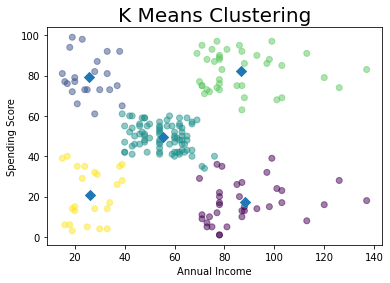

In [6]:
import pandas as pd  
from sklearn.cluster import KMeans  

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv')   
X = dataset[['annual_income','spending_score']]  

cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

#import library
import matplotlib.pyplot as plt

#convert dataframe to array
X = X.values
#Separate X to xs and ys --> use for chart axis
xs = X[:,0]
ys = X[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Measuring Cluster Criteria

Clustering yang baik adalah cluster yang data point-nya saling rapat/sangat berdekatan satu sama lain dan cukup berjauhan dengan objek/data point di cluster yang lain. Jadi, objek dalam satu cluster tidak tersebut berjauhan. Nah, untuk mengukur kualitas dari clustering, kita bisa menggunakan inertia

Inertia sendiri mengukur seberapa besar penyebaran object/data point data dalam satu cluster, semakin kecil nilai inertia maka semakin baik. Kita tidak perlu bersusah payah menghitung nilai inertia karena secara otomatis, telah dihitung oleh KMeans( ) ketika algorithm di fit ke dataset. Untuk mengecek nilai inertia cukup dengan print fungsi .inertia_ dari model yang sudah di fit ke dataset 

Meskipun suatu clustering dikatakan baik jika memiliki inertia yang kecil tetapi secara praktikal in real life, terlalu banyak cluster juga tidak diinginkan. Adapun rule untuk memilih jumlah cluster yang optimal adalah dengan memilih jumlah cluster yang terletak pada “elbow” dalam intertia plot, yaitu ketika nilai inertia mulai menurun secara perlahan. Jika dilihat pada gambar maka jumlah cluster yang optimal adalah K = 3

# Elbow Method

Membuat inertia plot untuk melihat apakah K = 5 merupakan jumlah cluster yang optimal

Untuk membuat inertia plot, silakan memanfaatkan fungsi looping (for):

[1] Pertama - tama, buatlah sebuah list kosong yang dinamakan 'inertia'. List ini akan kita gunakan untuk menyimpan nilai inertia dari setiap nilai K.

[2] Gunakan for untuk membuat looping dengan range 1-10. Sebagai index looping gunakan k

[3] Di dalam fungsi looping, deklarasikan  KMeans()  dengan nama cluster_model dan gunakan n_cluster = k, dan random_state = 24

[4] Gunakan fungsi .fit() dari cluster_model pada 'X'

[5] Dari dari cluster_model yang sudah di-fit ke dataset, dapatkan nilai inertia menggunakan inertia_ dan deklarasikan sebagai inertia_value

[6] Append inertia_value ke dalam list 'inertia'

[7] Setelah iterasi/looping selesai plotlah list 'inertia' tadi sebagai ordinat-nya dan absica-nya adalah range(1, 10).

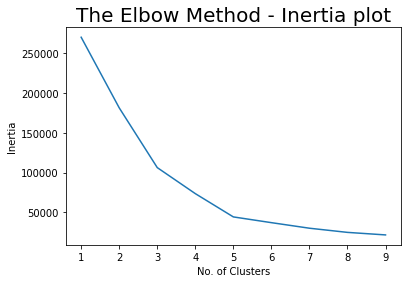

In [7]:
import pandas as pd  
from sklearn.cluster import KMeans  

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv')   
X = dataset[['annual_income','spending_score']]  

cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

#import library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
    
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

# MINI PROJECT

Case Study: Promos for our e-commerce - Part 1

Adapun feature - feature dalam dataset ini adalah :

[1] 'Daily Time Spent on Site' : lama waktu user mengunjungi site (menit)

[2] 'Age' : usia user (tahun)

[3] 'Area Income' : rata - rata pendapatan di daerah sekitar user

[4] 'Daily Internet Usage' : rata - rata waktu yang dihabiskan user di internet dalam sehari (menit)

[5] 'Ad Topic Line' : topik/konten dari promo banner

[6] 'City' : kota dimana user mengakses website

[7] 'Male' : apakah user adalah Pria atau bukan

[8] 'Country' : negara dimana user mengakses website

[9] 'Timestamp' : waktu saat user mengklik promo banner atau keluar dari halaman website tanpa mengklik banner

[10] 'Clicked on Ad' : mengindikasikan user mengklik promo banner atau tidak (0 = tidak; 1 = klik).

Di proyek ini, aku diharapkan untuk membuat machine learning model sesuai dengan prosedur machine learning yang sudah disharing sebelumnya. Jadi, tahap - tahap yang perlu dilakukan adalah

[1] Data eksplorasi dengan head(), info(), describe(), shape

Case Study: Promos for our e-commerce - Part 2

Sekarang mari melanjutkan dengan ekplorasi data untuk langkah ke-2 dan ke-3:

[1] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()

[2] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()

Case Study: Promos for our e-commerce - Part 3

Di proyek ini, aku akan melanjutkan mengeksplorasi data dengan visualisasi dengan tahap - tahap yang perlu dilakukan adalah:

Data eksplorasi dengan visualisasi:

[1] Jumlah user dibagi ke dalam rentang usia menggunakan histogram (hist()), gunakan bins = data.Age.nunique() sebagai argumen. nunique() adalah fungsi untuk menghitung jumlah data untuk setiap usia (Age).

[2] Gunakan pairplot() dari seaborn modul untuk menggambarkan hubungan setiap feature. 

Case Study: Promos for our e-commerce - Part 4

Di bagian proyek (langkah ke-5) ini aku akan mengecek apakah terdapat missing value dari data, jika terdapat missing value dapat dilakukan treatment seperti didrop atau diimputasi dan jika tidak maka dapat melanjutkan ke langkah berikutnya.

Cek missing value

Case Study: Promos for our e-commerce - Part 5

Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing :

[1] Deklarasikan data ke dalam X dengan mendrop feature/variabel yang bukan numerik, (type = object) dari data (Logistic Regression hanya dapat memproses numerik variabel). Assign Target/Label feature dan assign sebagai y

[2] Split X dan y ke dalam training dan testing dataset, gunakan perbandingan 80:20 dan random_state = 42

[3] Assign classifier sebagai logreg, kemudian fit classifier ke X_train dan predict dengan X_test. Print evaluation score.
 

Case Study: Promos for our e-commerce - Part 6

Print Confusion matrix dan classification report


[1] Data eksplorasi dengan head(), info(), describe(), shape
Lima data teratas:
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

         Timestamp  Cli

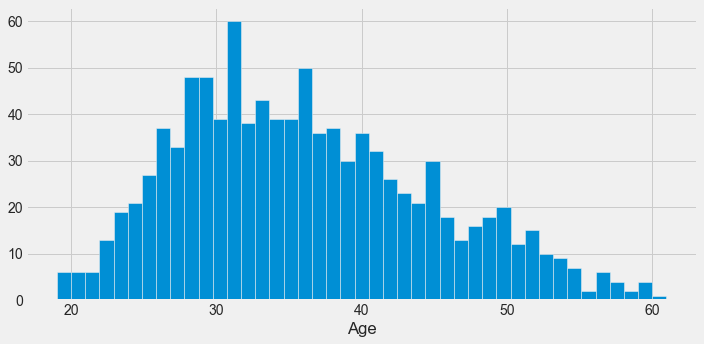

<Figure size 432x288 with 0 Axes>

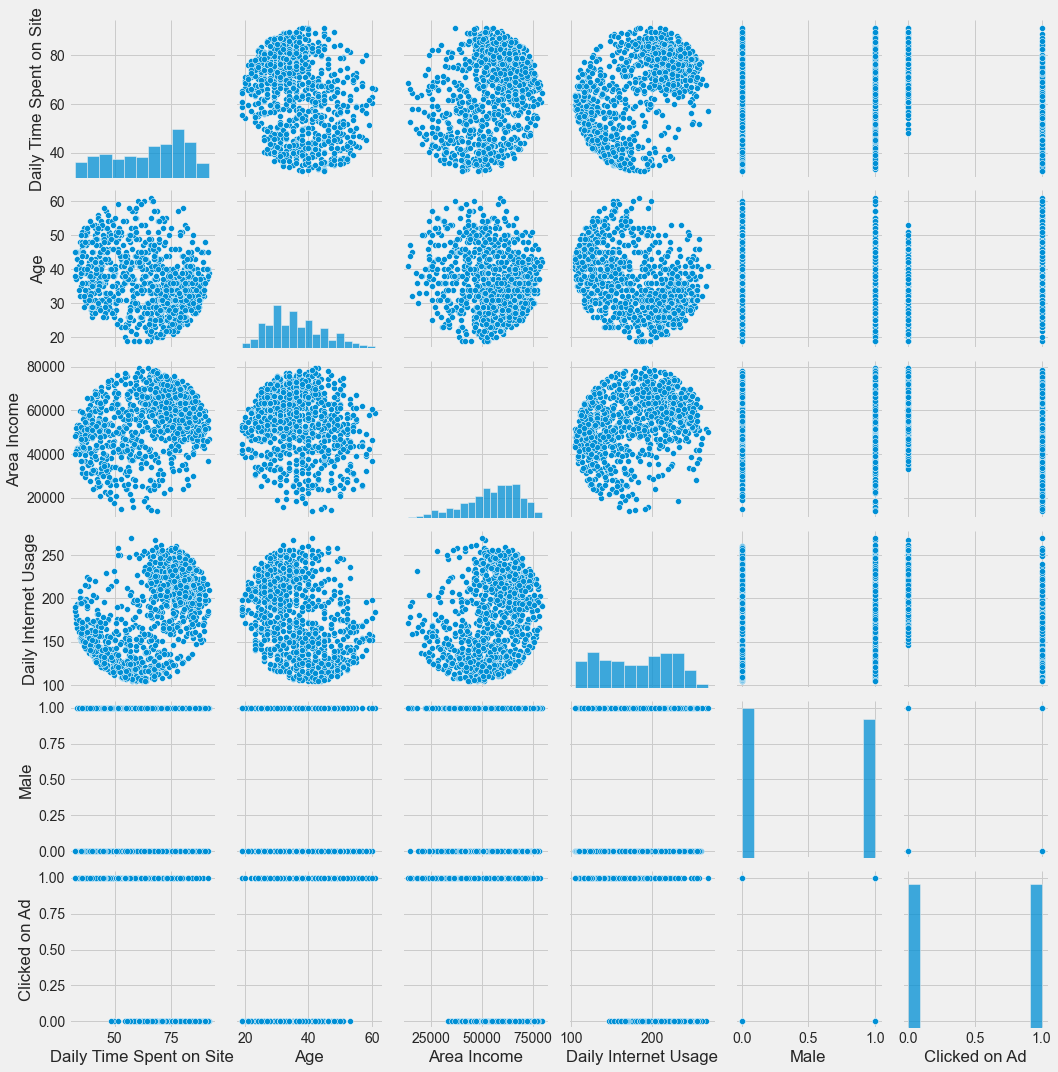


[5] Cek missing value
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64
0

[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
Evaluasi Model Performance:
Training Accuracy : 0.9
Testing Accuracy : 0.9

[7] Print Confusion matrix dan classification report
Confusion matrix:
[[85  4]
 [16 95]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



In [1]:
#import library 
import pandas as pd

# Baca data 'ecommerce_banner_promo.csv'
data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/ecommerce_banner_promo.csv')

#1. Data eksplorasi dengan head(), info(), describe(), shape
print("\n[1] Data eksplorasi dengan head(), info(), describe(), shape")
print("Lima data teratas:")
print(data.head())
print("Informasi dataset:")
print(data.info())
print("Statistik deskriptif dataset:")
print(data.describe())
print("Ukuran dataset:")
print(data.shape)

#2. Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
print("\n[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()")
print(data.corr())

#3. Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
print("\n[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()")
print(data.groupby('Clicked on Ad').size())

#import library
import matplotlib.pyplot as plt
import seaborn as sns

# Seting: matplotlib and seaborn
sns.set_style('whitegrid')  
plt.style.use('fivethirtyeight')

#4. Data eksplorasi dengan visualisasi
#4a. Visualisasi Jumlah user dibagi ke dalam rentang usia (Age) menggunakan histogram (hist()) plot
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins = data.Age.nunique())
plt.xlabel('Age')
plt.tight_layout()
plt.show()

#4b. Gunakan pairplot() dari seaborn (sns) modul untuk menggambarkan hubungan setiap feature.
plt.figure()
sns.pairplot(data)
plt.show()

#5. Cek missing value
print("\n[5] Cek missing value")
print(data.isnull().sum())
print(data.isnull().sum().sum())

#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#6.Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
print("\n[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing")
#6a.Drop Non-Numerical (object type) feature from X, as Logistic Regression can only take numbers, and also drop Target/label, assign Target Variable to y.   
X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

#6b. splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#6c. Modelling
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg = logreg.fit(X_train,y_train)
# Prediksi model
y_pred = logreg.predict(X_test)

#6d. Evaluasi Model Performance
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train,y_train))
print("Testing Accuracy :", logreg.score(X_test,y_test))

# Import library
from sklearn.metrics import confusion_matrix, classification_report

#7. Print Confusion matrix dan classification report
print("\n[7] Print Confusion matrix dan classification report")

#apply confusion_matrix function to y_test and y_pred
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

#apply classification_report function to y_test and y_pred
print("Classification report:")
cr = classification_report(y_test, y_pred)
print(cr)

[KESIMPULAN]

Model sudah sangat baik dalam memprediksi user yang akan melakukan action klik website atau tidak (Clicked on Ad). Buktinya:

[a] Nilai accuracy = 0.9 (tergolong akurasi sangat tinggi)
[b] Dataset memiliki jumlah label yang seimbang (balance class), sehingga evaluasi performance dapat menggunakan metrik accuracy